In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  glob
import seaborn as sns

tocategory = lambda col: pd.Categorical(col)
underscoretospace = lambda x: x.replace("_", " ") if type(x) is str else x
def q5(x): return x.quantile(.05)
def q95(x): return x.quantile(.95)

In [2]:
filenames = glob.glob("data/lsb.*.r*")
params = ["Algorithm", "Max threads", "Graph nodes"];

In [3]:
def get_df(filename):
    return (pd
      .read_csv(filename, sep=" ", comment="#", skipinitialspace=True, index_col="id")
      .applymap(underscoretospace)
      .dropna("columns", "all")
    )
df = pd.concat(get_df(filename) for filename in filenames)
df[["Algorithm", "Graph_name"]] = df[["Algorithm", "Graph_name"]].apply(tocategory)
df.columns = df.columns.map(underscoretospace)

In [4]:
df.head(5)

,Algorithm,Graph nodes,Graph name,Max threads,run,time,overhead
id,,,,,,,
0,parallel sollin AL,264346,USA-road-d.,1,0,1.915726e+06,0
1,parallel sollin AL,264346,USA-road-d.,1,1,2.296291e+06,1
2,parallel sollin AL,264346,USA-road-d.,1,2,2.305265e+06,5
3,parallel sollin AL,264346,USA-road-d.,1,3,2.236460e+06,0
4,parallel sollin AL,264346,USA-road-d.,1,4,2.288993e+06,0


In [5]:
df.tail(5)

,Algorithm,Graph nodes,Graph name,Max threads,run,time,overhead
id,,,,,,,
295,parallel sollin EL,264346,USA-road-d.,32,45,4.011515e+06,3
296,parallel sollin EL,264346,USA-road-d.,32,46,3.676147e+06,0
297,parallel sollin EL,264346,USA-road-d.,32,47,3.771425e+06,0
298,parallel sollin EL,264346,USA-road-d.,32,48,3.883567e+06,0
299,parallel sollin EL,264346,USA-road-d.,32,49,3.843310e+06,0


In [6]:
timequantiles = df.groupby(params).agg([q5, q95])["time"]
df_timequantiles =  timequantiles.loc[map(tuple, df[params].values)]

In [7]:
summary = (df[params + ["time"]]
    [(df.time >= df_timequantiles["q5"].values) & (df.time <= df_timequantiles["q95"].values)]
    .groupby(params).agg(["median", "mean", "min", "max", "std"])
)

In [8]:
summary

time                \
                                                  median          mean   
Algorithm          Max threads Graph nodes                               
Filter Kruskal     1           100          3.384438e+02  2.684565e+02   
                               1000         1.317905e+03  1.318069e+03   
                               10000        1.410199e+04  1.416110e+04   
                               100000       2.749487e+05  2.846128e+05   
                               264346       2.207321e+05  2.281026e+05   
                               1000000      3.660430e+06  3.709354e+06   
                   2           100          1.446890e+02  1.458628e+02   
                               1000         1.748490e+03  1.693072e+03   
                               10000        1.182168e+04  1.184504e+04   
                               100000       2.309640e+05  2.358562e+05   
                               264346       1.679293e+05  1.685029e+05   
                               1000000      3.007379e+06  3.093728e+06   
                   4           100          1.421101e+02  1.433811e+02   
                               1000         1.377985e+03  1.488890e+03   
                               10000        1.033824e+04  1.101384e+04   
                               100000       1.655183e+05  1.675854e+05   
                               264346       1.526305e+05  1.569486e+05   
                               1000000      2.043021e+06  2.089101e+06   
                   8           100          1.519602e+02  1.526024e+02   
                               1000         2.203662e+03  2.081281e+03   
                               10000        1.218345e+04  1.212222e+04   
                               100000       1.102555e+05  1.103629e+05   
                               264346       1.530187e+05  1.498441e+05   
                               1000000      1.399070e+06  1.404076e+06   
                   16          100          1.704492e+02  1.723548e+02   
                               1000         3.799997e+03  3.328332e+03   
                               10000        1.584574e+04  1.595916e+04   
                               100000       1.100347e+05  1.081132e+05   
                               264346       1.371519e+05  1.374380e+05   
                               1000000      1.112500e+06  1.109893e+06   
...                                                  ...           ...   
parallel sollin AL 1           100          1.754875e+03  1.784894e+03   
                               1000         3.233980e+04  3.233019e+04   
                               10000        1.068333e+06  1.069266e+06   
                               264346       2.215090e+06  2.224736e+06   
                   2           100          2.288611e+03  2.307255e+03   
                               1000         5.639144e+04  5.643315e+04   
                               10000        9.497589e+05  9.509059e+05   
                               264346       2.225664e+06  2.252556e+06   
                   4           100          4.613081e+03  4.634400e+03   
                               1000         5.699731e+04  5.721264e+04   
                               10000        8.404384e+05  8.476219e+05   
                               264346       2.203938e+06  2.188785e+06   
                   8           100          5.046411e+03  5.051618e+03   
                               1000         5.895074e+04  5.898959e+04   
                               10000        7.752916e+05  7.846862e+05   
                               264346       2.264473e+06  2.300695e+06   
                   16          100          7.595112e+03  7.635363e+03   
                               1000         6.697712e+04  6.751399e+04   
                               10000        8.435048e+05  8.392794e+05   
                               264346       2.691268e+06  2.722864e+06   
                   32          100          9.234658e+03

In [9]:
g_idx = ["Graph nodes", "Graph name"]
graphs = df[g_idx].drop_duplicates().values

/opt/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


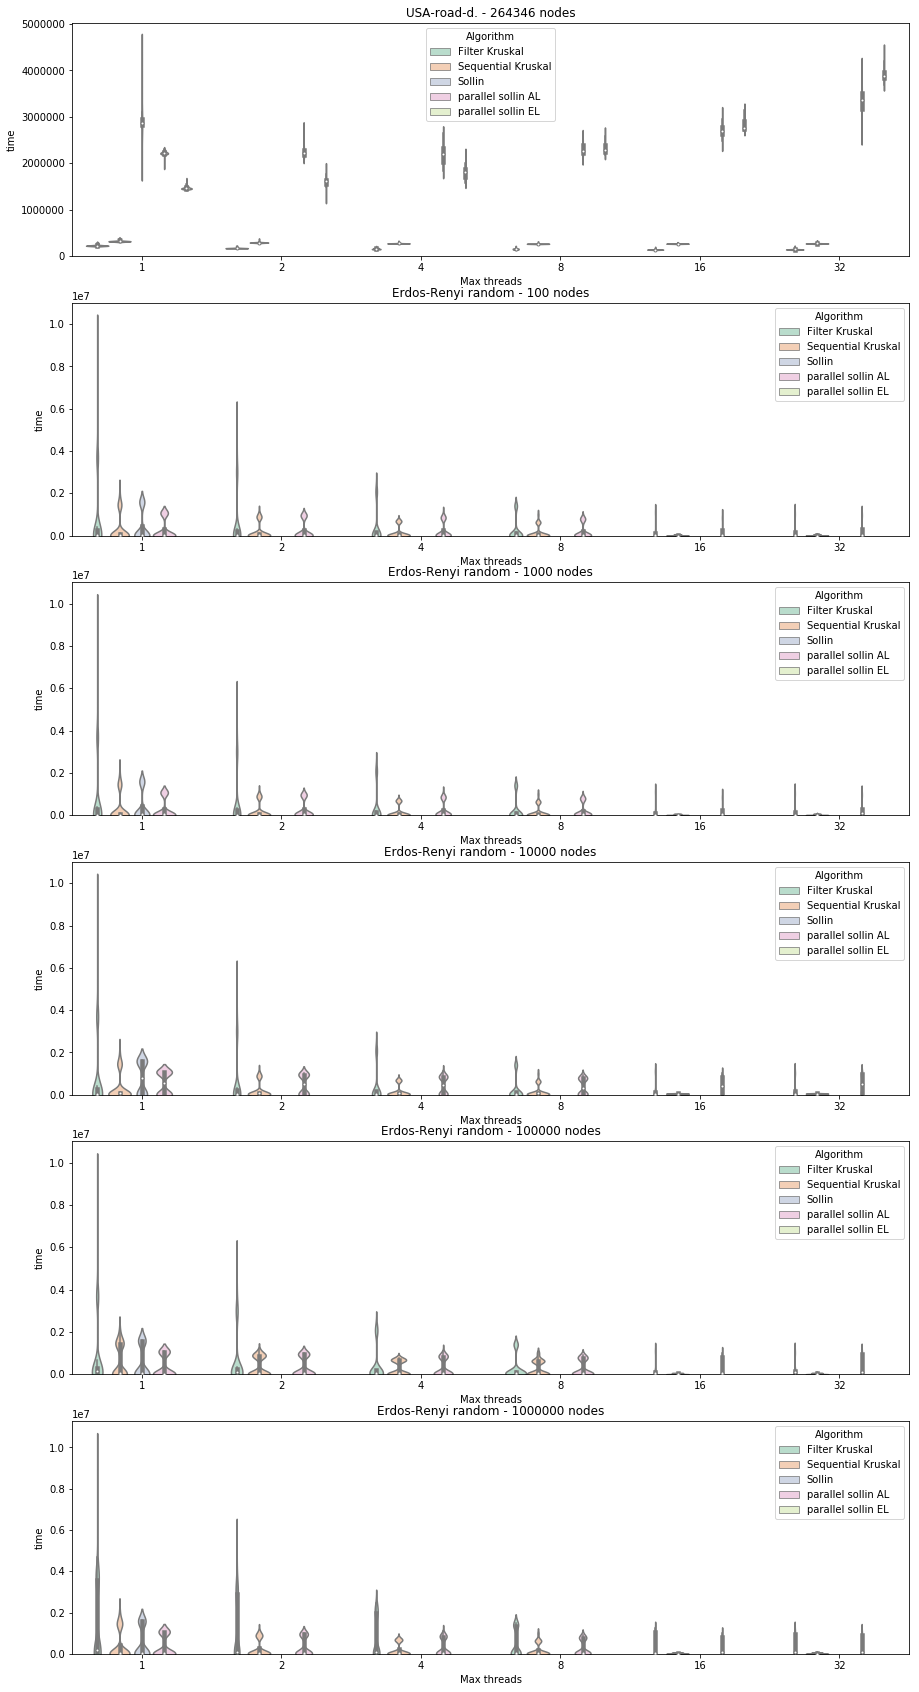

In [10]:
fig, ax = plt.subplots(nrows=len(graphs),figsize=(15,5*len(graphs)))
for i, e in enumerate(graphs):
    sns.violinplot(
        x="Max threads", y="time", hue="Algorithm", 
        data=df[df[g_idx].values == e], 
        palette="Pastel2", ax=ax[i]
    )
    ax[i].set_title(f"{e[1]} - {e[0]} nodes")
    ax[i].set_ylim(0,)

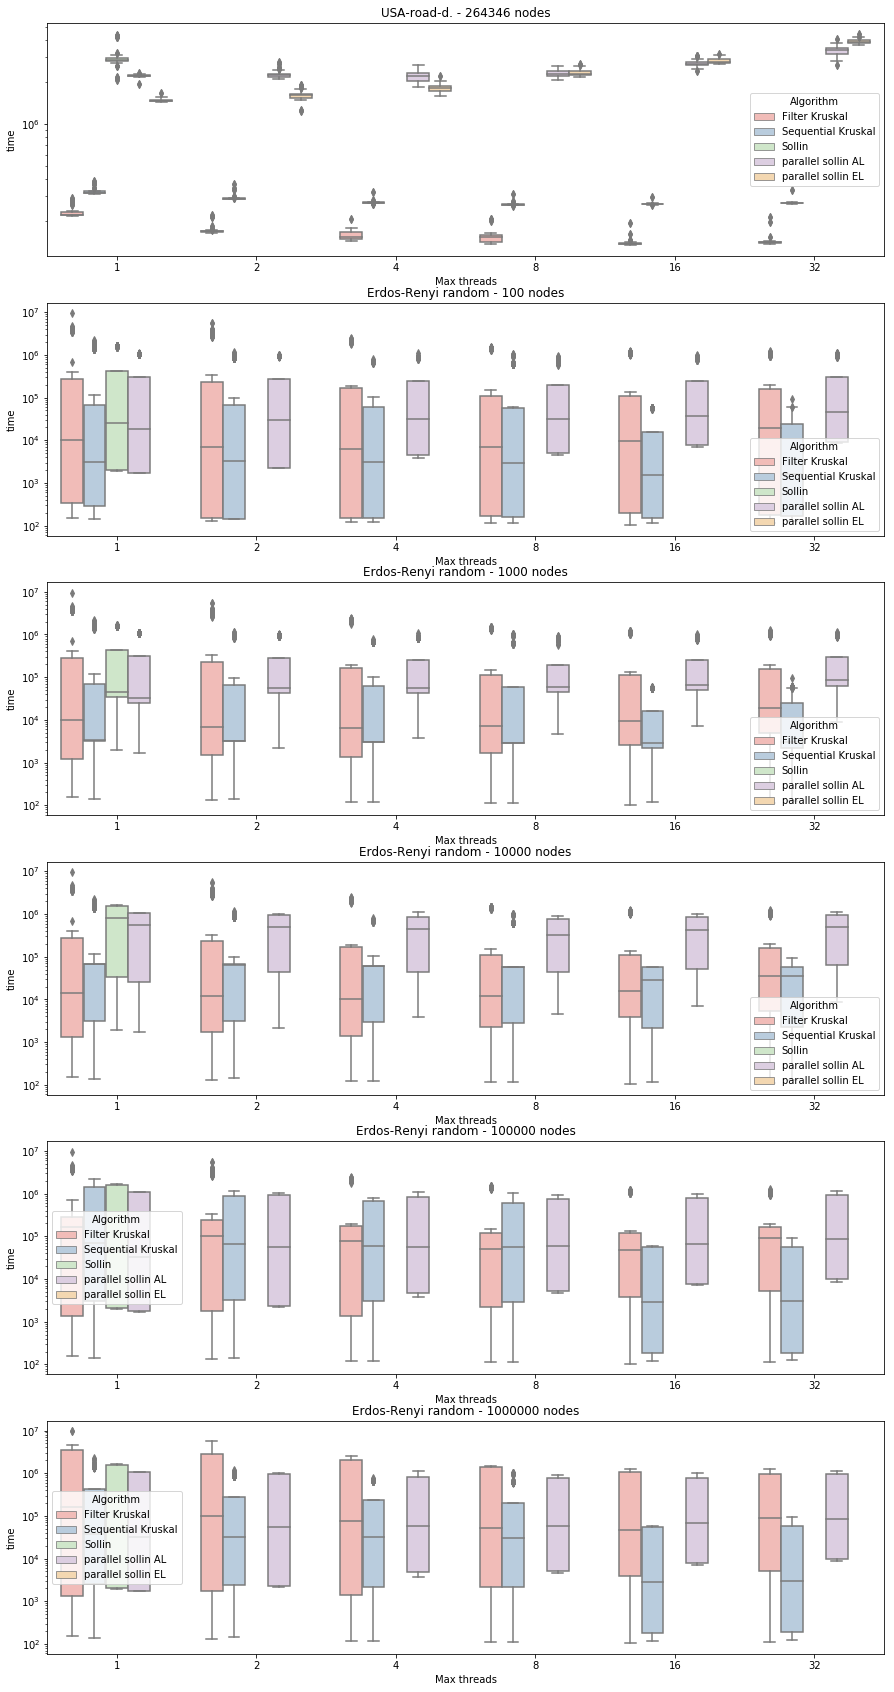

In [11]:
fig, ax = plt.subplots(nrows=len(graphs),figsize=(15,5*len(graphs)))
for i, e in enumerate(graphs):
    sns.boxplot(
        x="Max threads", y="time", hue="Algorithm", 
        data=df[df[g_idx].values == e], 
        palette="Pastel1", ax=ax[i]
    ).set(yscale="log")
    ax[i].set_title(f"{e[1]} - {e[0]} nodes")